# Experiment 3 – Denoising corrupted digits
Use the trained RBM as a prior to clean noisy digit images.

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from rbm_utils import (
    load_digits_data,
    load_model,
    rbm_gibbs_step,
    corrupt_bits,
    hamming_error,
)

np.random.seed(2)


In [2]:

model_path = "models/rbm_digits_50.npz"
params, target_size = load_model(model_path)

X_train, X_test, target_size = load_digits_data(
    target_size=target_size, threshold=0.5, test_size=0.2, seed=1
)

noise_levels = [0.1, 0.3, 0.5]
num_steps = 5
num_examples = 12
num_show = 4

print("Data shapes:", X_train.shape, X_test.shape)


Data shapes: (1437, 196) (360, 196)


Noise 0.1 -> error 0.0791
Noise 0.3 -> error 0.1798
Noise 0.5 -> error 0.2717


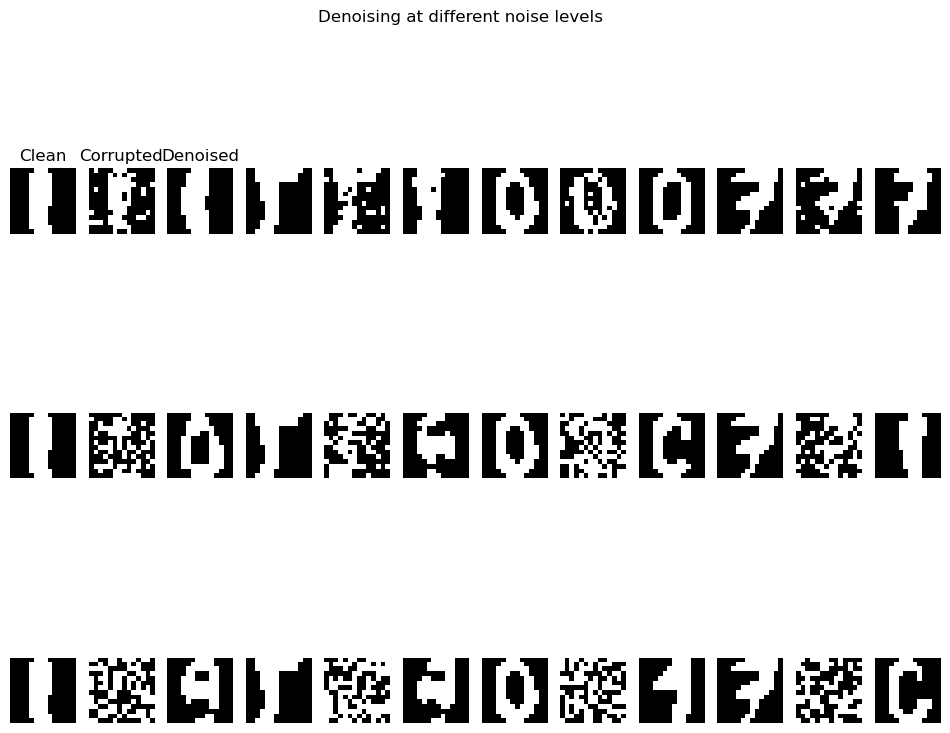

In [3]:

denoise_errors = []

fig, axes = plt.subplots(len(noise_levels), num_show * 3, figsize=(num_show * 3, len(noise_levels) * 3))

for row, noise in enumerate(noise_levels):
    corrupted = corrupt_bits(X_test[:num_examples], noise)
    denoised = corrupted.copy()
    for _ in range(num_steps):
        denoised = rbm_gibbs_step(denoised, params.W, params.b, params.c)

    err = hamming_error(X_test[:num_examples], denoised)
    denoise_errors.append(err)
    print(f"Noise {noise:.1f} -> error {err:.4f}")

    for k in range(num_show):
        base = k * 3
        axes[row, base].imshow(X_test[k].reshape(target_size), cmap="gray")
        axes[row, base].axis("off")
        axes[row, base + 1].imshow(corrupted[k].reshape(target_size), cmap="gray")
        axes[row, base + 1].axis("off")
        axes[row, base + 2].imshow(denoised[k].reshape(target_size), cmap="gray")
        axes[row, base + 2].axis("off")
        if row == 0 and k == 0:
            axes[row, base].set_title("Clean")
            axes[row, base + 1].set_title("Corrupted")
            axes[row, base + 2].set_title("Denoised")

plt.suptitle("Denoising at different noise levels")
plt.show()


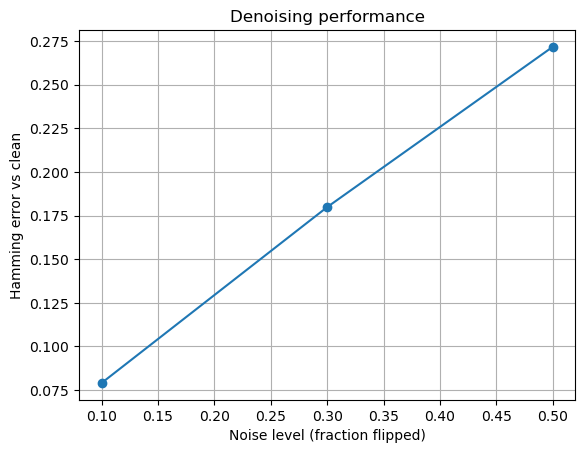

In [4]:

plt.plot(noise_levels, denoise_errors, marker="o")
plt.xlabel("Noise level (fraction flipped)")
plt.ylabel("Hamming error vs clean")
plt.title("Denoising performance")
plt.grid(True)
plt.show()
